# Introduction to Statistical Mechanics (ME346A)

## Diffusion and Classical Mechanics + Thermodynamics

### Install Dependencies

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib

### Diffusion in 2D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Classical Mechanics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Hamiltonian
def hamiltonian(xp):
  x, p = xp[:, 0], xp[:, 1]

  return p ** 2 / 2 - np.cos(x)

In [ ]:
# Kinetic energy
def kinetic(xp):
  return xp[:, 1] ** 2 / 2

In [ ]:
# Potential energy
def potential(xp):
  return -np.cos(xp[:, 0])

In [ ]:
# Velocity Verlet Algorithm
def verlet(xp, dt):
  """
  Updates x and p following the Verlet algorithm.

  Parameters
  ----------
  xp: spatial and momentum [B, 2]
  dt: timestep

  Returns
  -------
  xp: spatial
  pp: momentum

  """
  x, p = xp[:, 0], xp[:, 1]

  xn = x + p * dt - np.sin(x) * dt ** 2 / 2
  pn = p - (np.sin(x) + np.sin(xn)) / 2 * dt

  xpn = np.column_stack((xn, pn))

  return xpn

In [ ]:
# Physical parameters
n_step = 2000
n_sample = 10000
h_min, h_max = 0.8, 0.9
dt = 0.04

In [ ]:
# Initialize
x = 0.2 * np.random.rand(n_sample, 1) - 0.1
p = 0.2 * np.random.rand(n_sample, 1) + 1.8
xp = np.hstack((x, p))

In [ ]:
# Mask out
H = hamiltonian(xp)
mask = (H >= h_min) & (H <= h_max)
xp = xp[mask]

In [ ]:
# Run velocity verlet algorithm
xps = []

for _ in range(n_step):
  xp = verlet(xp, dt)
  xps.append(xp)

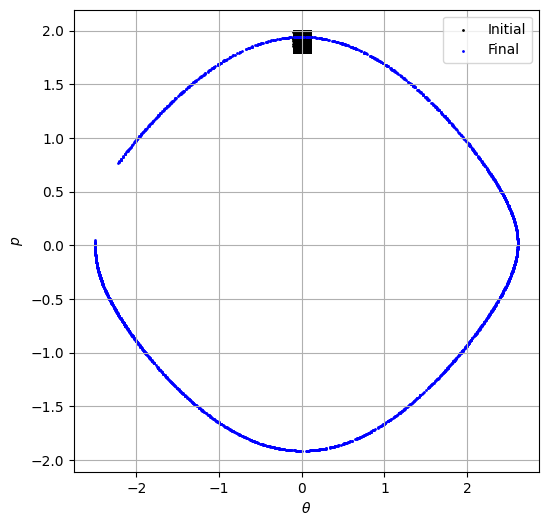

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot results
xn, pn = xp[:, 0], xp[:, 1]

plt.figure(figsize=(6, 6))
plt.scatter(x, p, s=1, color='black', label='Initial')
plt.scatter(xn, pn, s=1, color='blue', label='Final')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p$')
# plt.title('Plot of x vs. p after applying the Velocity Verlet Algorithm')
plt.grid(True)
plt.legend()
plt.show()
plt.clf()

In [ ]:
# Time series data
hs = [np.mean(hamiltonian(xp)) for xp in xps] # hamiltonians
ks = [np.mean(kinetic(xp)) for xp in xps] # kinetic energy
ps = [np.mean(potential(xp)) for xp in xps] # potential energy

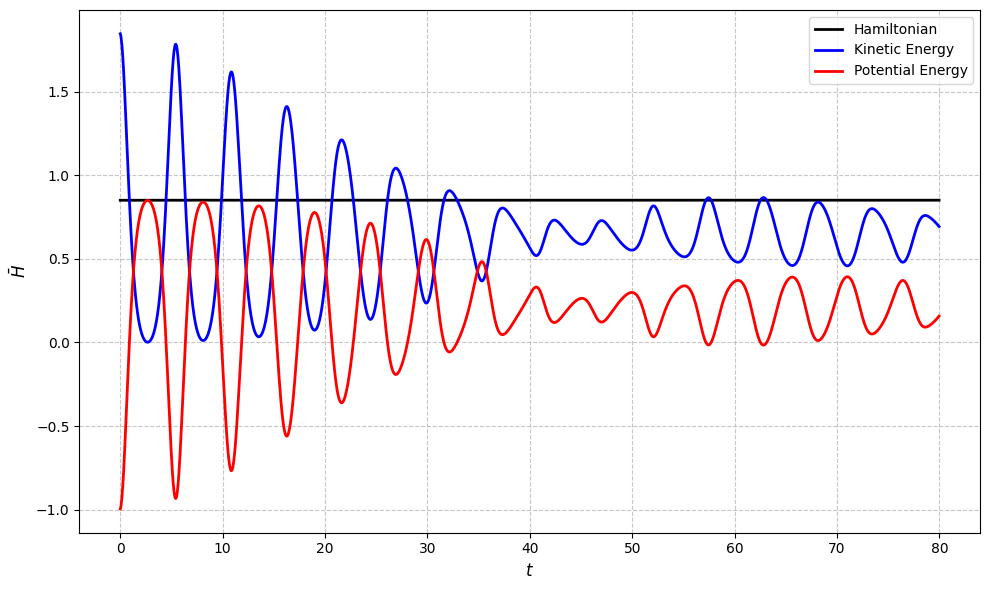

In [ ]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_step) * dt, hs, linewidth=2, color='black', label='Hamiltonian')
plt.plot(np.arange(n_step) * dt, ks, linewidth=2, color='blue', label='Kinetic Energy')
plt.plot(np.arange(n_step) * dt, ps, linewidth=2, color='red', label='Potential Energy')
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$\bar H$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend()
plt.show()

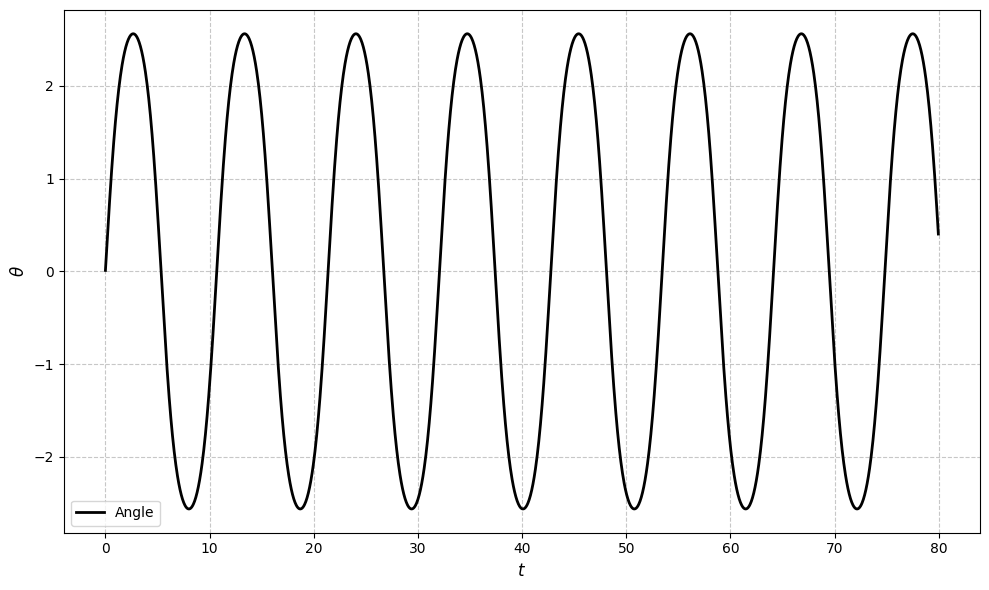

In [ ]:
# Animation?
xpa = [xp[0, 0] for xp in xps]

plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_step) * dt, xpa, linewidth=2, color='black', label='Angle')
plt.xlabel(r'$t$', fontsize=12)
plt.ylabel(r'$\theta$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.legend()
plt.show()

### Classical Mechanics - Single Agent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def verlet_single(q, p, dt=0.04):
  qn = q + p * dt - np.sin(q) * dt ** 2 / 2
  pn = p - (np.sin(q) + np.sin(qn)) / 2 * dt

  return qn, pn

In [23]:
qz1, pz1 = 0.0, np.sqrt(3.6)
qz2, pz2 = 0.0, np.sqrt(3.8)
qz3, pz3 = 0.0, np.sqrt(4.0)
qz4, pz4 = 0.0, np.sqrt(4.2)
qz5, pz5 = 0.0, np.sqrt(9.0)

qs1, ps1 = [qz1], [pz1]
qs2, ps2 = [qz2], [pz2]
qs3, ps3 = [qz3], [pz3]
qs4, ps4 = [qz4], [pz4]
qs5, ps5 = [qz5], [pz5]

dt = 0.04
tend = 200
n_step = int(tend / dt)

for _ in range(n_step):
  q1, p1 = verlet_single(qs1[-1], ps1[-1], dt=dt)
  q2, p2 = verlet_single(qs2[-1], ps2[-1], dt=dt)
  q3, p3 = verlet_single(qs3[-1], ps3[-1], dt=dt)
  q4, p4 = verlet_single(qs4[-1], ps4[-1], dt=dt)
  q5, p5 = verlet_single(qs5[-1], ps5[-1], dt=dt)

  qs1.append(q1); ps1.append(p1)
  qs2.append(q2); ps2.append(p2)
  qs3.append(q3); ps3.append(p3)
  qs4.append(q4); ps4.append(p4)
  qs5.append(q5); ps5.append(p5)

# Periodic [-\pi, +\pi]
qs1, ps1 = np.array(qs1), np.array(ps1)
qs2, ps2 = np.array(qs2), np.array(ps2)
qs3, ps3 = np.array(qs3), np.array(ps3)
qs4, ps4 = np.array(qs4), np.array(ps4)
qs5, ps5 = np.array(qs5), np.array(ps5)

qs3 = (qs3 + np.pi) % (2 * np.pi) - np.pi
qs4 = (qs4 + np.pi) % (2 * np.pi) - np.pi
qs5 = (qs5 + np.pi) % (2 * np.pi) - np.pi

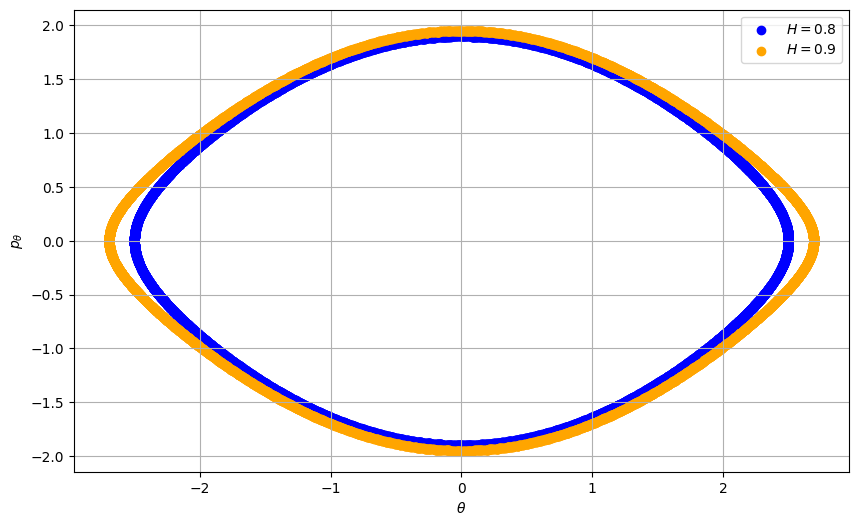

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(qs1, ps1, color='blue', label=r'$H = 0.8$')
plt.scatter(qs2, ps2, color='orange', label=r'$H = 0.9$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p_{\theta}$')
plt.legend()
plt.grid(True)
plt.show()

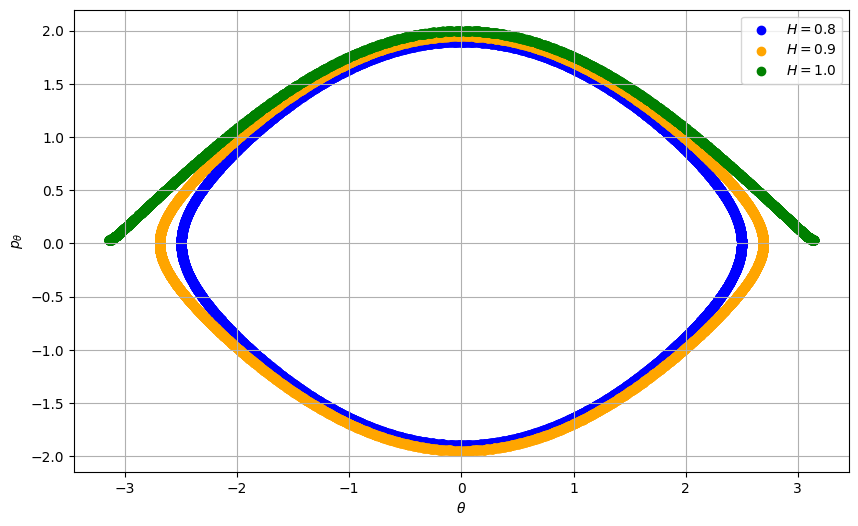

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(qs1, ps1, color='blue', label=r'$H = 0.8$')
plt.scatter(qs2, ps2, color='orange', label=r'$H = 0.9$')
plt.scatter(qs3, ps3, color='green', label=r'$H = 1.0$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p_{\theta}$')
plt.legend()
plt.grid(True)
plt.show()

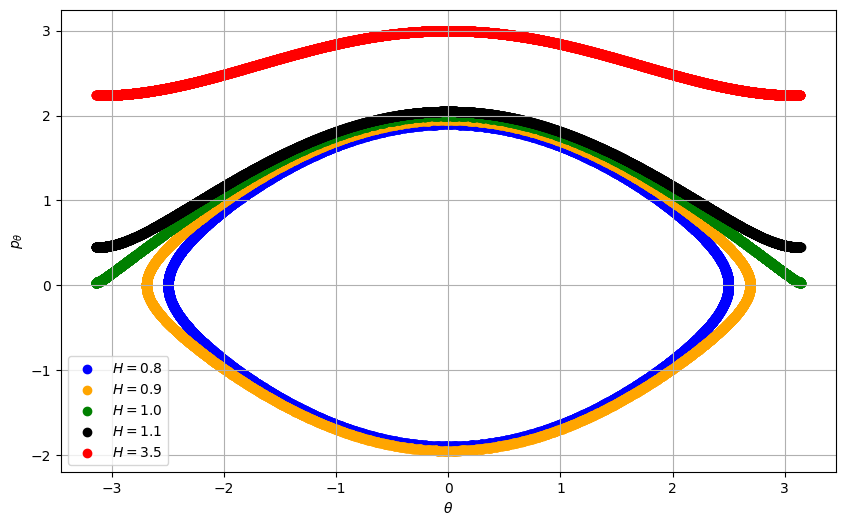

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(qs1, ps1, color='blue', label=r'$H = 0.8$')
plt.scatter(qs2, ps2, color='orange', label=r'$H = 0.9$')
plt.scatter(qs3, ps3, color='green', label=r'$H = 1.0$')
plt.scatter(qs4, ps4, color='black', label=r'$H = 1.1$')
plt.scatter(qs5, ps5, color='red', label=r'$H = 3.5$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p_{\theta}$')
plt.legend()
plt.grid(True)
plt.show()